# Setting up the environment
First, I'll set up the environment for analysis with pandas, numpy, matplotlib, stats and seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Uploading the US-Accidents dataset
This dataset contains over 2 million accident records since 2016 from 49 states across the U.S. It was made available for download in May 2019 by Sobhan Moosavi. More information, including a link to download, is available at https://smoosavi.org/datasets/us_accidents.

For each accident record, it contains information on location, driving conditions, and a variety of nearby traffic objects (i.e. bumps, roundabouts, stops). Each accident is also rated on 4-point scale for the severity of its impact on traffic, where 1 indicates a small impact and 4 indicates a large impact. 

In [3]:
acdnts = pd.read_csv("/Users/eph/Desktop/Thinkful/US_Accidents_May19.csv")

In [4]:
acdnts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [5]:
acdnts.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
print("\nMissing Values:")
print(acdnts.isna().sum())


Missing Values:
ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           

# Initial observations
There are 49 columns and 2,243,939 rows of data, expressed as strings, floats, booleans, and integers. 

For this project, I am interested in looking for correlations between adverse weather and accident occurrence and/or severity. I will use the visibility, precipitation, and weather condition fields to indicate adverse weather. In my proposal, I specifically hypothesized that accidents will be more severe when visibility is low.

Moosavi's documentation states precipitation will be null when there is no precipitation. First, I'll replace those null values with 0. Then, I'll begin analysis with statistics on the full dataframe.

In [7]:
acdnts['Precipitation(in)'] = acdnts['Precipitation(in)'].fillna(0)

In [8]:
acdnts[['Precipitation(in)']].isna().sum()

Precipitation(in)    0
dtype: int64

In [9]:
acdnts.describe().round(2)

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1727177.00,2243939.00,2243939.00,2243939.00,516762.00,516762.00,2243939.00,785537.00,2181674.00,391569.00,2179472.00,2186659.00,2172579.00,1800985.00,2243939.00
mean,207.35,2.38,36.46,-94.86,37.44,-96.53,0.29,5625.28,61.23,26.04,65.93,30.04,9.12,8.84,0.01
std,19.41,0.55,4.96,17.09,5.13,17.99,1.53,11071.87,19.15,13.48,22.43,0.23,2.99,4.97,0.15
min,200.00,0.00,24.57,-124.62,24.57,-124.50,0.00,1.00,-77.80,-65.90,4.00,0.00,0.00,1.20,0.00
25%,201.00,2.00,33.48,-117.14,33.89,-117.87,0.00,803.00,48.90,19.20,50.00,29.92,10.00,5.80,0.00
50%,201.00,2.00,35.86,-88.18,38.04,-90.19,0.00,2672.00,63.00,28.70,68.00,30.03,10.00,8.10,0.00
75%,201.00,3.00,40.42,-80.85,41.39,-80.90,0.01,6846.00,75.90,36.40,85.00,30.15,10.00,11.50,0.00
max,406.00,4.00,49.00,-67.11,49.08,-67.11,333.63,961052.00,170.60,45.20,100.00,33.04,140.00,822.80,10.80


# Exploring trends with statistics
At first glance, the mean visibility, 9.12 miles, is higher and the mean precipitation, 0.01 inches, is lower than I would have predicted.

Let's look closer at the distributions of these variables.

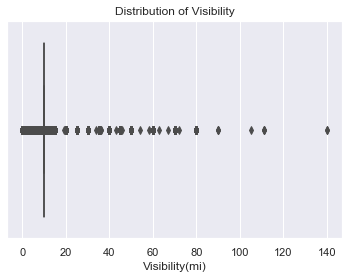

In [10]:
sns.boxplot(x ='Visibility(mi)', data=acdnts)
plt.title('Distribution of Visibility')
plt.show()

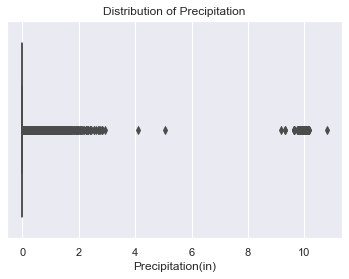

In [11]:
sns.boxplot(x ='Precipitation(in)', data=acdnts)
plt.title('Distribution of Precipitation')
plt.show()

In both boxplots above, the majority of data is near the median, about 10mi for visibility and 0in for precipitation, again suggesting clear conditions.

Let's see how the weather condition field correlates with total accidents...

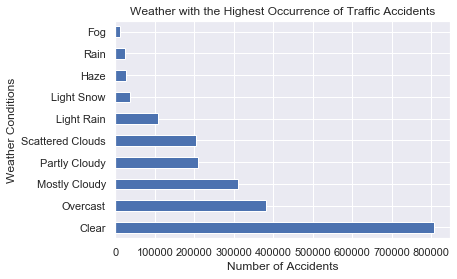

In [12]:
acdnts['Weather_Condition'].value_counts().head(10).plot('barh')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.title('Weather with the Highest Occurrence of Traffic Accidents')
plt.show()

Surprisingly, most accidents occurred during clear weather! Adverse weather does not seem to indicate the occurrence of traffic accidents.

Next, I'll look at how adverse weather impacts accident severity.

# Exploring accident severity

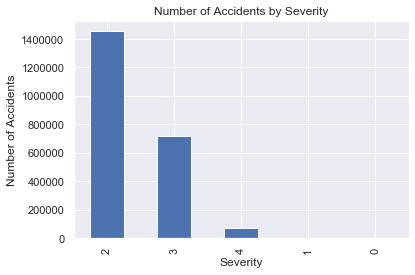

In [29]:
acdnts['Severity'].value_counts().plot('bar')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Severity')
plt.show()

Relationships between Visibility, Precipitation, and Accident Severity


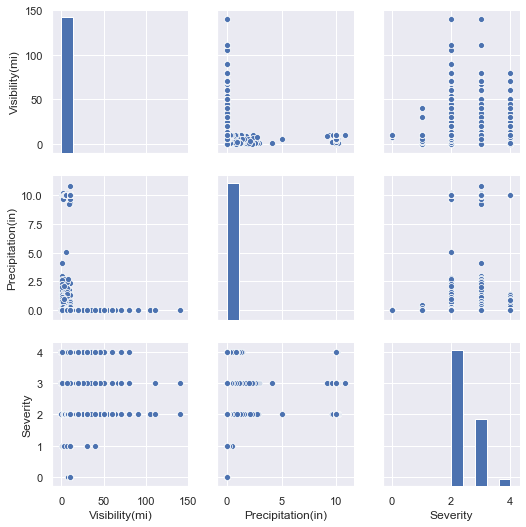

In [14]:
sns.pairplot(acdnts, vars=['Visibility(mi)', 'Precipitation(in)', 'Severity'])
print("Relationships between Visibility, Precipitation, and Accident Severity")

Most accidents in the dataset are rated 2, followed by 3, then 4. There are not enough accidents rated 1 here to assess accidents with the lowest impact on traffic. For future analysis, it would be useful to collect more samples with a 1 rating.

Looking at the pair plots above, neither visibility nor precipitation seem to be correlated with higher severity.

Let's see if average severity differs among the 10 most common weather conditions.

In [15]:
top_weather = acdnts['Weather_Condition'].value_counts().head(10) 
list(top_weather.index) # creating a list with top conditions

['Clear',
 'Overcast',
 'Mostly Cloudy',
 'Partly Cloudy',
 'Scattered Clouds',
 'Light Rain',
 'Light Snow',
 'Haze',
 'Rain',
 'Fog']

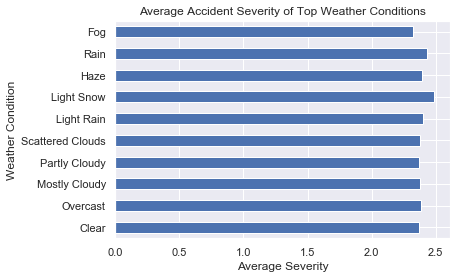

In [16]:
mean_severity = acdnts.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False)
mean_severity[list(top_weather.index)].plot('barh')
plt.xlabel('Average Severity')
plt.ylabel('Weather Condition')
plt.title('Average Accident Severity of Top Weather Conditions')
plt.show()

I was surprised to see that there is very little variability in average severity. Recalling the exploratory statistics above, the mean severity across the full dataset in 2.38, which is about where most of these weather conditions fall. Light snow has the highest average severity in the above chart, at about 2.5. 

Adverse weather does not seem to indicate higher severity or when accidents will be most severe.

Next, I'll create a dataset to look specifically at accidents rated severity 4.

# Analyzing severity 4 accidents

In [17]:
acdnts_4 = acdnts[acdnts['Severity']==4]
acdnts_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72002 entries, 619 to 2243938
Data columns (total 49 columns):
ID                       72002 non-null object
Source                   72002 non-null object
TMC                      1427 non-null float64
Severity                 72002 non-null int64
Start_Time               72002 non-null object
End_Time                 72002 non-null object
Start_Lat                72002 non-null float64
Start_Lng                72002 non-null float64
End_Lat                  70575 non-null float64
End_Lng                  70575 non-null float64
Distance(mi)             72002 non-null float64
Description              72002 non-null object
Number                   32854 non-null float64
Street                   72002 non-null object
Side                     72002 non-null object
City                     71990 non-null object
County                   72002 non-null object
State                    72002 non-null object
Zipcode                  71942 non-n

In [18]:
acdnts_4.describe().round(2)

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1427.00,72002.0,72002.00,72002.00,70575.00,70575.00,72002.00,32854.00,68779.00,17442.00,68673.00,68993.00,68323.00,55248.00,72002.00
mean,231.39,4.0,38.02,-89.39,38.10,-89.36,1.62,7929.38,56.91,24.90,68.49,30.04,9.07,8.98,0.01
std,61.80,0.0,4.85,15.01,4.81,15.03,3.55,16648.32,20.29,13.32,22.29,0.21,3.25,5.30,0.11
min,200.00,4.0,24.57,-124.46,24.57,-124.42,0.00,1.00,-40.00,-65.90,4.00,26.85,0.00,1.20,0.00
25%,201.00,4.0,34.14,-95.37,34.22,-95.30,0.23,1100.00,41.20,17.90,53.00,29.92,10.00,5.80,0.00
50%,201.00,4.0,39.24,-84.11,39.28,-84.08,0.61,3699.00,59.00,27.15,71.00,30.04,10.00,8.10,0.00
75%,241.00,4.0,41.32,-78.32,41.35,-78.23,1.63,9206.00,73.00,35.10,87.00,30.17,10.00,11.50,0.00
max,406.00,4.0,49.00,-67.61,49.08,-67.61,138.91,961043.00,117.00,45.20,100.00,31.12,80.00,471.80,10.02


Distribution of Visibility of All Accidents & Severity 4


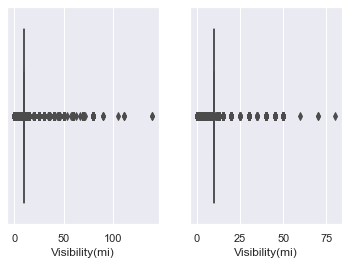

In [19]:
fig, ax = plt.subplots(1,2)
sns.boxplot(x='Visibility(mi)', data=acdnts, ax=ax[0])
sns.boxplot(x='Visibility(mi)', data=acdnts_4, ax=ax[1])
fig.show()
print('Distribution of Visibility of All Accidents & Severity 4')

Distribution of Precipitation of All Accidents & Severity 4


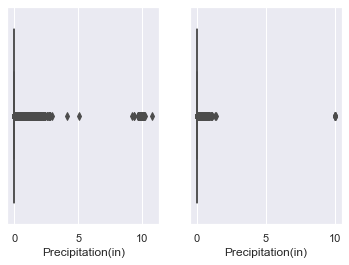

In [20]:
fig, ax = plt.subplots(1,2)
sns.boxplot(x='Precipitation(in)', data=acdnts, ax=ax[0])
sns.boxplot(x='Precipitation(in)', data=acdnts_4, ax=ax[1])
fig.show()
print('Distribution of Precipitation of All Accidents & Severity 4')

The mean visibility is 9.07 miles, and the mean precipitation is .01 inches, again suggesting clear conditions. These averages are also very close to the averages we saw in the full dataset. 

The distributions of these variables at severity 4 are similar to the full dataset as well. All of the boxplots above have a very short interquartile range, with outliers below and above the median.

Let's see where most severity 4 accidents happened in the U.S.

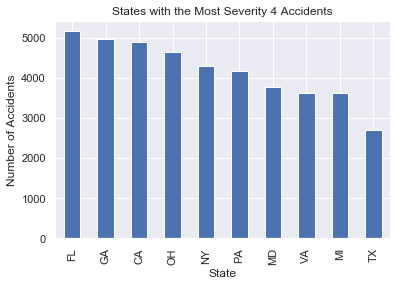

In [30]:
acdnts_4['State'].value_counts().head(10).plot('bar')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title('States with the Most Severity 4 Accidents')
plt.show()

I was surprised again that Florida, the 'Sunshine State', had more severity 4 accidents than any other state, followed by Georgia.

I'll create dataframes representing all accidents in each of these states, then use the latitude and longitude variables to plot them. If cityscaping and/or demographics impact severity, I would expect to see severity concentrated in specific parts of each state.

In [22]:
acdnts_FL = acdnts[acdnts['State']=='FL']
acdnts_GA = acdnts[acdnts['State']=='GA']

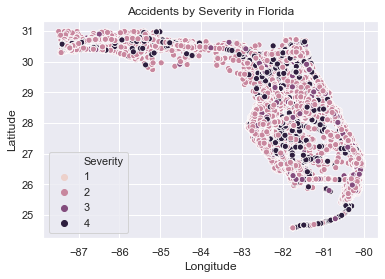

In [23]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=acdnts_FL, hue='Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents by Severity in Florida')
plt.show()

In [24]:
# Creating a df to get a clearer picture of severity 4's across FL
acdnts_FL_4 = acdnts_FL[acdnts_FL['Severity']==4]

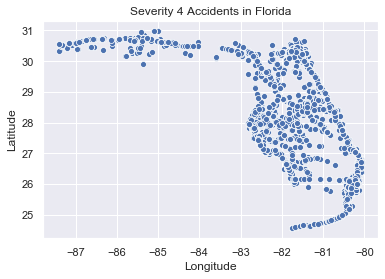

In [25]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=acdnts_FL_4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Severity 4 Accidents in Florida')
plt.show()

Most accidents in Florida are severity 2, with more severe accidents disbursed throughout the state.

There does appear to be a higher concentration of severe accidents on the southern peninsula. In future analysis, it would be interesting to look at similar land formations across this dataset to see if there is a trend. 

Let's look at Georgia.

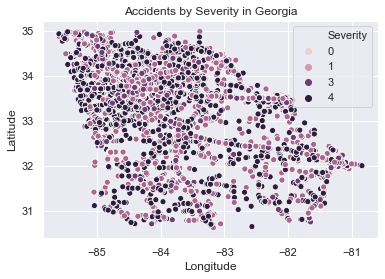

In [26]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=acdnts_GA, hue='Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents by Severity in Georgia')
plt.show()

In [27]:
# Creating a df to get a clearer picture of severity 4's across GA
acdnts_GA_4 = acdnts_GA[acdnts_GA['Severity']==4]

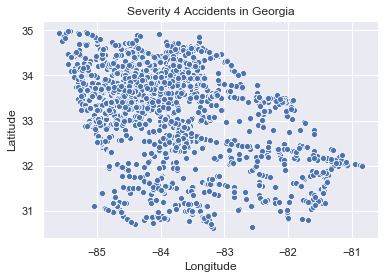

In [28]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=acdnts_GA_4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Severity 4 Accidents in Georgia')
plt.show()

Compared to Florida, Georgia has a higher percentage of severity 4 accidents. There are more accidents in the northern part of the state, but severity levels appear evenly distributed.

# Conclusions
Based on my analysis, I conclude that there is not a correlation between adverse weather and accident occurrence nor severity. More analysis is needed to identify factors that could reliably indicate accidents and their impacts on traffic.

The Urban Institute tracks highway and road expenditures by state, using data from the U.S. Census Bureau. Interestingly, Florida and Georgia are among the states reported to spend the least per capita. For further analysis, I would recommend exploring if accidents and accident severity correlate with state spending.

Link to Urban Institute data: https://www.urban.org/policy-centers/cross-center-initiatives/state-and-local-finance-initiative/state-and-local-backgrounders/highway-and-road-expenditures

# Acknowledgments
Thank you to Sobhan Moosavi for making this dataset available.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.